In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/차별금지법(59,421건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '커뮤니티'))
    return df

community = load_all_data()

## 커뮤니티 Sheet

In [4]:
community.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3    86
dtype: int64

In [5]:
community.columns = community.iloc[0]
community.drop(0, inplace=True, axis=0)
community = community.dropna(axis=0, how='any')
community = community[~community['내용'].str.contains('http')]
community = community[community['내용'].str.contains('[가-힣]')]
community = community[community['내용'].str.len() < 1000]


print(community.shape)
community.head()

(2534, 4)


,작성일,작성자,제목,내용
4,2021/07/14,이토랜드,[뉴스] _x000D_\n유은혜 “차별금지법에 학력 포함 동의”…“제외” 하루 만에 선회,유은혜 “차별금지법에 학력 포함 동의”…“제외” 하루 만에 선회 _x000D_\n이...
6,2021/07/01,붇옹산의 부동산스터디,"차별금지법, 평등법 통과 되도록 놔둬야 할까요?","차별금지법, 평등법 이란거 찾아보니 절대 통과되선 안되는 법이더군요 _x000D_\..."
9,2021/09/20,에펨코리아2,"차별금지법은 통과될 일도 없고, 그거 미는 애들은 무조건 떨어짐",코시국에 자영업자 자살하신분 조문은 막아도 조용기 목사 조문 행렬은 못 막음 _x0...
11,2021/08/31,MLB파크,"OECD에서 포괄적 차별금지법 없는 거 한국,일본밖에 없는 거 아나요?",차별금지법을 무슨 정치인 누구 욕 하면 잡아가는 사상검증법이라고 가짜뉴스 엄청 퍼뜨...
21,2021/09/04,카페파우더룸3,차별 금지법 말고요,자국민 차별 금지법 만들어야 하는거 아닌가요? _x000D_\n자국민 역차별 하는것...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_community = tfdif(community['내용'])

In [8]:
tfidf_community = tfidf_community.loc[:, tfidf_community.columns.str.contains('[가-힣]')]

In [9]:
tfidf_community

,180석,2021년,30대,40대,5년간,_x000d_ 검수완박,_x000d_ 결국,_x000d_ 과연,_x000d_ 그걸,_x000d_ 그냥,...,홍준표,홍준표가,확대,확대 _x000d_,후보,후보가,후보는,후보를,후보의,훨씬
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159699
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2530,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2531,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108061,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2532,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [10]:
import pickle

tfidf_community.to_pickle('tfidf_community.pkl')

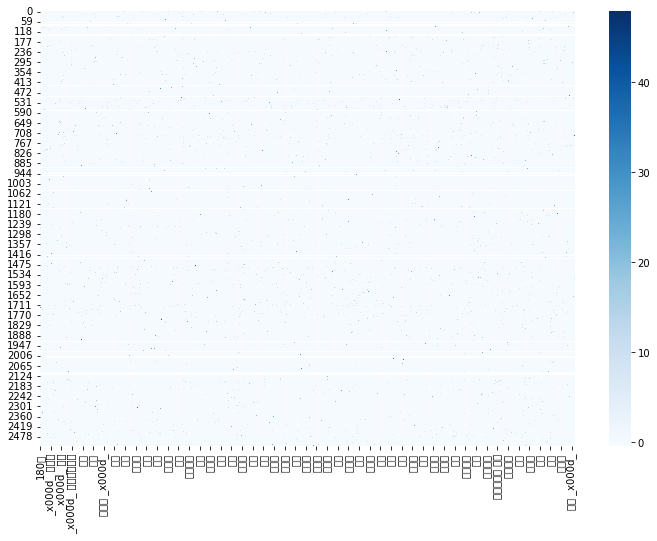

In [11]:
tfidf_community = (tfidf_community - tfidf_community.mean()) / tfidf_community.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_community, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly here as well

as we can see in the graph above